In [1]:
!pip install config

In [2]:
# Import Matplot lib
import os
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
import sys

In [3]:
import pandas as pd
import numpy as np

In [4]:
# Import SQLAlchemy `automap` and other dependencies here
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from config import engine

In [5]:
inspector = inspect(engine)
inspector.get_table_names()

['dept_emp', 'departments', 'dept_manager', 'titles', 'employees', 'salaries']

In [6]:
#Code to get column names from any of the tables
columns = inspector.get_columns('titles')
for c in columns:
    print(c['name'], c["type"])

title_id VARCHAR
title VARCHAR


In [7]:
#Code to get data from the tables
engine.execute('SELECT * FROM salaries LIMIT 10').fetchall()

[(10001, 60117),
 (10002, 65828),
 (10003, 40006),
 (10004, 40054),
 (10005, 78228),
 (10006, 40000),
 (10007, 56724),
 (10008, 46671),
 (10009, 60929),
 (10010, 72488)]

# Reflect Database and Query 

In [8]:
Base = automap_base()
Base.prepare(engine, reflect=True)
titles = Base.classes.titles
employees = Base.classes.employees
salaries = Base.classes.salaries

In [9]:
session = Session(engine)

In [10]:
employees1 = session.query(employees.emp_no, employees.emp_title_id).\
    order_by(employees.emp_no.desc()).all()

In [11]:
emp_num = [employee[0] for employee in employees1]
emp_title_id = [employee[1] for employee in employees1]

In [12]:
title1 = session.query(titles.title_id, titles.title).\
    order_by(titles.title_id.desc()).all()

In [13]:
title_id = [title[0] for title in title1]
title = [title[1] for title in title1]

In [14]:
salaries1 = session.query(salaries.emp_no, salaries.salary).\
    order_by(salaries.emp_no.desc()).all()

In [15]:
salary_emp_num = [salary[0] for salary in salaries1]
salary = [salary[1] for salary in salaries1]

# Adding lists to pandas DF

In [25]:
emp_df = pd.DataFrame(dict(emp_num=emp_num, emp_title_id=emp_title_id))
emp_df

,emp_num,emp_title_id
0,499999,e0002
1,499998,s0001
2,499997,e0003
3,499996,e0003
4,499995,e0002
...,...,...
300019,10005,s0001
300020,10004,e0003
300021,10003,e0003
300022,10002,s0001


In [28]:
title_df = pd.DataFrame(dict(title_id=title_id, title=title))
title_df

,title_id,title
0,s0002,Senior Staff
1,s0001,Staff
2,m0001,Manager
3,e0004,Technique Leader
4,e0003,Senior Engineer
5,e0002,Engineer
6,e0001,Assistant Engineer


In [39]:
salary_df = pd.DataFrame(dict(emp_num= salary_emp_num, salary=salary))
salary_df


,emp_num,salary
0,499999,63707
1,499998,40000
2,499997,49597
3,499996,58058
4,499995,40000
...,...,...
300019,10005,78228
300020,10004,40054
300021,10003,40006
300022,10002,65828


In [40]:
emp_salary = emp_df.merge(salary_df, on ='emp_num')

In [41]:
emp_salary_title = emp_salary.merge(title_df, left_on='emp_title_id', right_on='title_id')

In [42]:
emp_salary_title

,emp_num,emp_title_id,salary,title_id,title
0,499999,e0002,63707,e0002,Engineer
1,499995,e0002,40000,e0002,Engineer
2,499994,e0002,40000,e0002,Engineer
3,499993,e0002,40000,e0002,Engineer
4,499990,e0002,40000,e0002,Engineer
...,...,...,...,...,...
300019,110183,m0001,48291,m0001,Manager
300020,110114,m0001,52070,m0001,Manager
300021,110085,m0001,60026,m0001,Manager
300022,110039,m0001,69941,m0001,Manager


In [43]:
title_salaries = emp_salary_title.groupby('title')['salary'].mean().round(2)

In [44]:
title_salaries

title
Assistant Engineer    48564.43
Engineer              48535.34
Manager               51531.04
Senior Engineer       48506.80
Senior Staff          58550.17
Staff                 58465.38
Technique Leader      48582.90
Name: salary, dtype: float64

Text(0, 0.5, 'Average Salary')

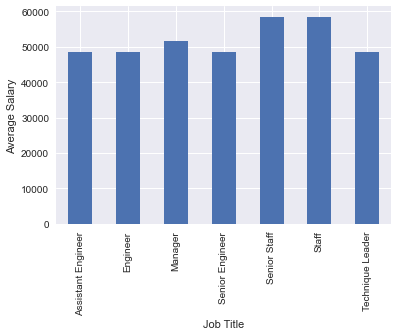

In [45]:
title_salaries.plot.bar()
plt.xlabel("Job Title")
plt.ylabel("Average Salary")